In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
path = r'C:\Users\joelf\OneDrive\Documents\NPSAnalysis'

In [2]:
#looking at NPs and NMs as it is more typical for them to have campsites
df = pd.read_csv(os.path.join(path, 'Parks and Location.csv'))
df = df.loc[(df['ParkType'] == 'National Park') | (df['ParkType'] == 'National Monument')]

Hypothesis: When there are more Campers in the park, the number of recreation hours in the park increases.

In [4]:
#6
X = df['Campers'].values.reshape(-1,1)
y = df['RecreationHours'].values.reshape(-1,1)

In [5]:
#7 splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
#8 run a linear regression
regression = LinearRegression()
regression.fit(X_train, y_train)
y_predicted = regression.predict(X_test)

Text(0, 0.5, 'Recreation Hours')

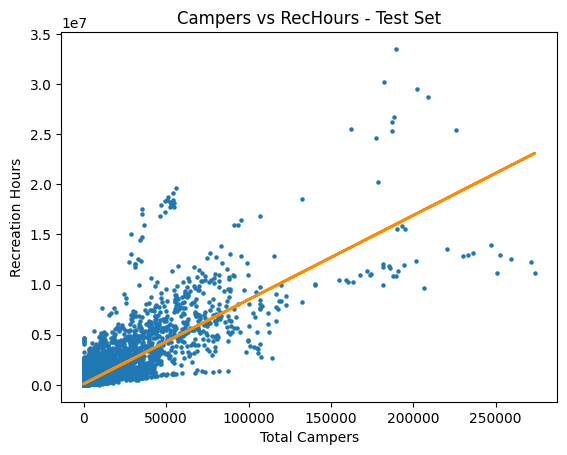

In [7]:
#9 plot
plt.scatter(X_test, y_test, s = 5)
plt.plot(X_test, y_predicted, color='darkorange', linewidth =2)
plt.title('Campers vs RecHours - Test Set')
plt.xlabel('Total Campers')
plt.ylabel('Recreation Hours')

While there is clearly a trend that matches my hypothesis based on the graph I do not expect a high MSE and an r^2 above .5 but not by a lot.

In [8]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print('Slope:' , regression.coef_)
print('MSE: ', rmse)
print('r^2: ', r2)

Slope: [[83.99539173]]
MSE:  757270410474.6057
r^2:  0.6852126220462129


In [9]:
act_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
act_pred.head(10)

,Actual,Predicted
0,279587,133011.955169
1,5440,111509.134887
2,158389,300750.752449
3,126394,154514.775451
4,139054,111089.157928
5,79103,111089.157928
6,1496,115624.909081
7,52544,111089.157928
8,3609,111089.157928
9,96305,123436.480512


The r2 of .685 shows that the model of predicting recreation hours based on number of campers is valid but the very high MSE shows that the model, while valid, may not always be close to the true number.

For curiosity sake I am running the test again looking at just NPs and not NMs. I dont expect to see much difference.

In [10]:
df_np = df.loc[df['ParkType'] == 'National Park']

In [11]:
X2 = df_np['Campers'].values.reshape(-1,1)
y2 = df_np['RecreationHours'].values.reshape(-1,1)

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)
regression2 = LinearRegression()
regression2.fit(X_train2, y_train2)
y_predicted2 = regression2.predict(X_test2)

Text(0, 0.5, 'RecreationHours')

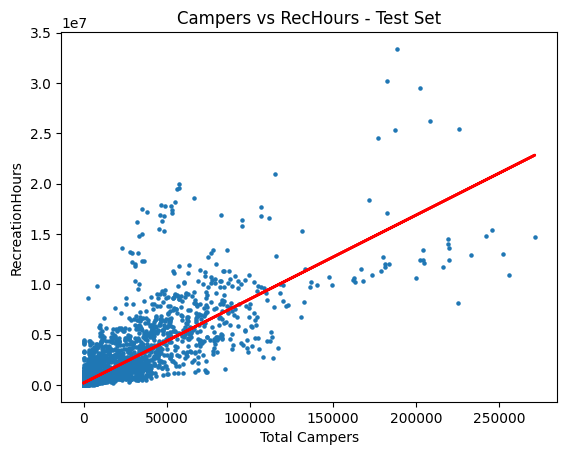

In [13]:
plt.scatter(X_test2, y_test2, s = 5)
plt.plot(X_test2, y_predicted2, color='red', linewidth =2)
plt.title('Campers vs RecHours - Test Set')
plt.xlabel('Total Campers')
plt.ylabel('RecreationHours')

In [14]:
rmse2 = mean_squared_error(y_test2, y_predicted2)
r2_ = r2_score(y_test2, y_predicted2)
print('Slope:' , regression.coef_)
print('MSE: ', rmse2)
print('r^2: ', r2_)

Slope: [[83.99539173]]
MSE:  1409626192616.4463
r^2:  0.6740280196735486


In [15]:
act_pred2 = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_predicted2.flatten()})
act_pred2.head(30)

,Actual,Predicted
0,7308,2.055189e+05
1,165891,2.060186e+05
2,987386,1.246896e+06
3,1084,2.063517e+05
4,119855,6.509190e+05
5,0,2.055189e+05
6,674371,1.073166e+06
7,26640,2.838054e+05
8,107505,4.766899e+05
9,913568,2.416639e+05


A slightly lower r2 and a Predicted array with many repeated values again as many places dont allow camping.